In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
sns.set()
%config InlineBackend.figure_formats = {'png', 'retina'}

RNA_seq = pd.read_csv("../data/extracted_original_TPM_mean_values.csv",index_col=0)
Cap_seq = pd.read_csv("../data/rna_seq_normalized_count_in_mRNA.csv",index_col=0)

In [2]:
RNA_seq.head()

,Ws-0_0hr,Ws-0_2hr-PopP2,Ws-0_4hr-PopP2,Ws-0_6hr-PopP2,Ws-0_8hr-PopP2,Ws-0_2hr-C321A,Ws-0_4hr-C321A,Ws-0_6hr-C321A,Ws-0_8hr-C321A,rrs1_0hr,rrs1_2hr-PopP2,rrs1_4hr-PopP2,rrs1_6hr-PopP2,rrs1_8hr-PopP2
Locus,,,,,,,,,,,,,,
AT1G01680_PUB54,0.000000,0.700000,97.766667,596.800000,575.766667,1.966667,5.033333,36.766667,43.166667,0.000000,0.90,8.000000,40.033333,85.000000
AT1G07160_AP2C2,0.000000,103.400000,185.600000,100.966667,34.933333,99.000000,162.433333,145.700000,29.766667,0.000000,54.20,212.900000,115.833333,34.633333
AT1G07920,64.766667,68.133333,47.266667,90.400000,95.700000,31.266667,50.300000,85.933333,81.166667,62.266667,53.25,67.700000,83.733333,104.533333
AT1G19250_FMO1,0.000000,0.400000,96.733333,532.400000,1457.100000,1.666667,11.533333,23.100000,41.466667,0.000000,5.30,8.666667,33.400000,110.033333
AT1G32640_MYC2,27.366667,156.900000,89.233333,46.300000,58.333333,164.300000,64.900000,45.433333,45.433333,21.533333,56.65,57.500000,39.766667,51.866667


In [3]:
Cap_seq.head()

,eds1_a2_r1,eds1_a2_r2,eds1_a2_r3,eds1_a4_r1,eds1_a4_r2,eds1_a4_r3,eds1_kv_r1,eds1_kv_r2,eds1_kv_r3,eds1_mk_r1,...,wt_a4_r3,wt_kv_r1,wt_kv_r2,wt_kv_r3,wt_mk_r1,wt_mk_r2,wt_mk_r3,wt_un_r1,wt_un_r2,wt_un_r3
AT1G01680_PUB54,15423.249986,7711.458657,8691.229718,3972.503738,3142.112320,1662.793478,5150.570803,2391.645291,2060.195943,1401.009415,...,15330.970821,7950.481103,8628.947799,10472.970293,7775.802531,7266.034750,6891.799739,242.832560,279.955784,1434.995859
AT1G07160_AP2C2,2721.086336,5552.138186,3779.622607,9608.523009,8113.705735,5451.216967,9010.254839,6912.036271,4519.258879,591.489453,...,1463.435531,1765.283781,3602.303768,5752.954470,288.757613,184.928860,212.074118,16.508522,8.097839,21.662682
AT1G07920,1211.163347,6223.246652,3370.458318,11045.821415,9977.192037,8443.865752,8261.796817,15142.573123,8087.857013,31142.973816,...,1387.546556,3046.334062,3346.088845,1786.246246,8162.445533,9611.363784,6718.492135,22368.990340,22866.445459,18480.128282
AT1G19250_FMO1,8379.724096,2795.288558,2178.089515,1234.272702,1693.462439,1035.116200,1468.817654,369.785410,400.331036,615.765166,...,7925.147796,21681.576975,8430.190920,4743.239972,7403.482634,3190.922089,5211.074479,0.000000,32.154772,52.132023
AT1G32640_MYC2,3796.223648,2266.307131,2015.675599,9874.348424,4861.226247,10608.585967,10267.599246,9934.253027,6033.314200,94555.596641,...,2269.726468,4221.630856,2751.782100,2941.070985,34688.089996,26079.601615,20891.993364,26297.884771,26592.079754,26759.679460


# Lmplot between TimeSeries data vs CAP_I_RNA data

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


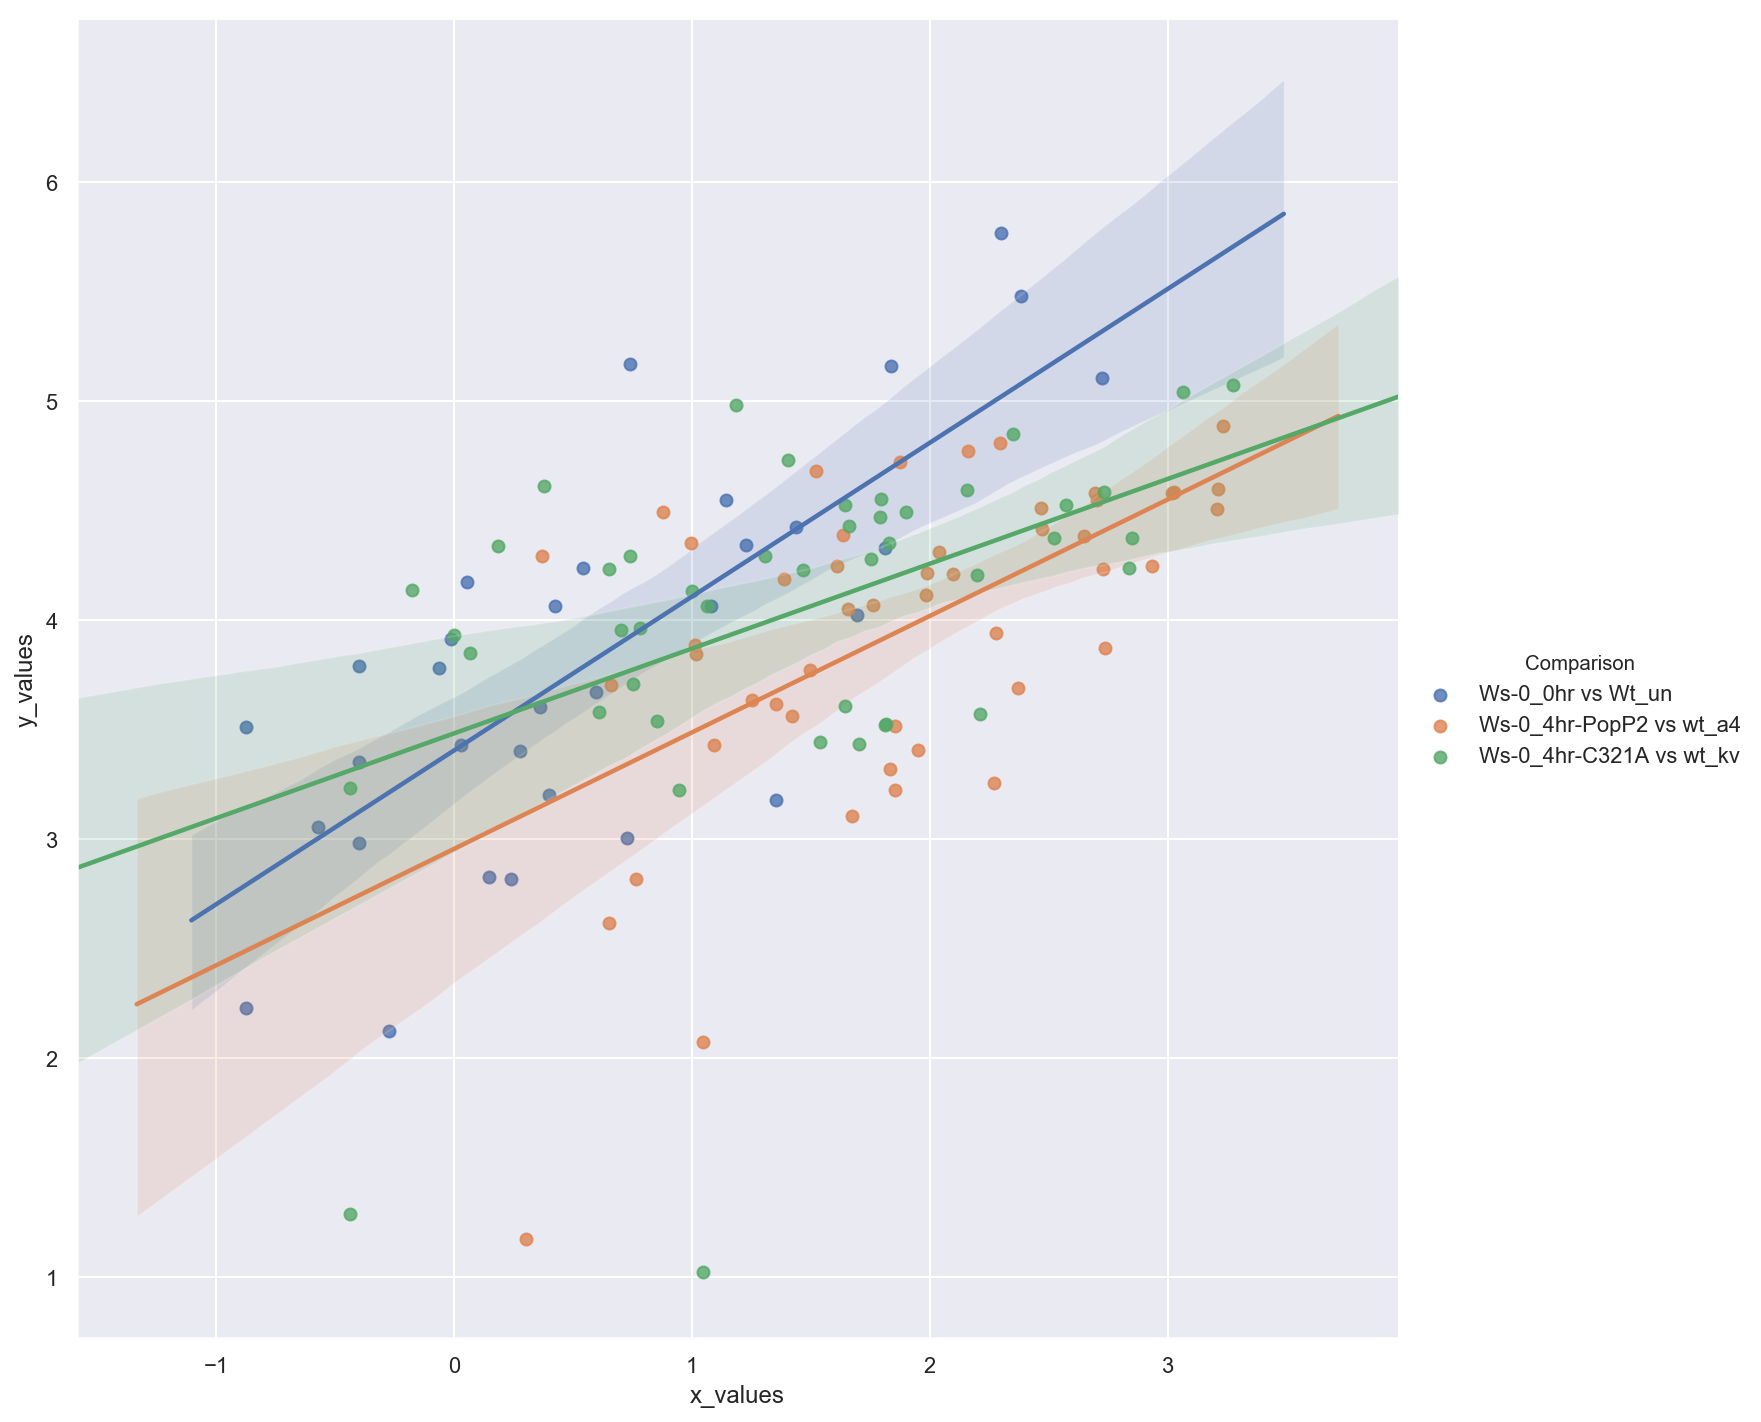

In [5]:
RNA_seq_values = np.concatenate([np.log10(RNA_seq["Ws-0_0hr"].values),
                                 np.log10(RNA_seq["Ws-0_4hr-PopP2"].values),
                                 np.log10(RNA_seq["Ws-0_4hr-C321A"].values)
                                ],0)
Cap_seq_values = np.concatenate([np.log10(Cap_seq.loc[:,["wt_un_r1", "wt_un_r2", "wt_un_r3"]].mean(axis=1).values),
                                 np.log10(Cap_seq.loc[:,["wt_a4_r1", "wt_a4_r2", "wt_a4_r3"]].mean(axis=1).values),
                                 np.log10(Cap_seq.loc[:,["wt_kv_r1", "wt_kv_r2", "wt_kv_r3"]].mean(axis=1).values)
                                ],0)
classes = np.concatenate([np.full(52, "Ws-0_0hr vs Wt_un"),
                          np.full(52, "Ws-0_4hr-PopP2 vs wt_a4"),
                          np.full(52, "Ws-0_4hr-C321A vs wt_kv")
                         ],0)
data=pd.DataFrame({
    "x_values": RNA_seq_values,
    "y_values": Cap_seq_values,
    "Comparison": classes
})
data = data.loc[(data["x_values"] > -100) & (data["y_values"] > -100)]

sns.lmplot(x="x_values", y="y_values", data=data, height=10, hue="Comparison")